# Italian Rap

- Questions about PCA, ICA, Italy ? Post them in the chat.
- [Music Spreadsheet](https://docs.google.com/spreadsheets/d/1pI9buwhzb9b78QJnFF7-PGmF6V0v-heMgyK12sEST-s/edit?usp=sharing)

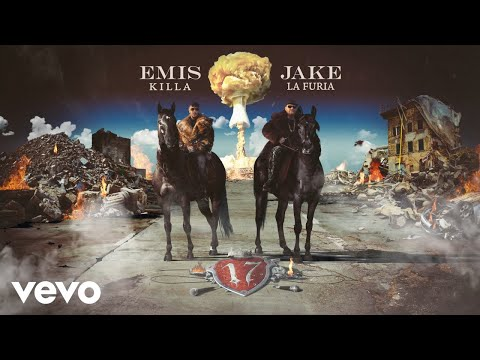

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("VLLTTDkCUYI",width=640,height=360,
             list='PLkqz3S84Tw-SDiSBnVVpvIkri9mTd44mq')

# Day 14 Pre-Class Assignment
---

![skydive](https://media.giphy.com/media/l2YWhCIfvUHbiHFSw/giphy.gif)

Example solutions to the skydiver problem

## Solution to the skydiver problem using update equations

The following code provides a solution to the skydiver problem using update equations for the case when air resistance is included.

In [ ]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

In [ ]:
# Create a function to compute derivaives of velocity and height
def derivs(v,g):
    '''
    Calculate the derivatives.
    
    Inputs
    ------
    v : float
        Instantaneous velocity.
        
    g : float
        Gravitational acceleration.
    
    Return
    ------
    dhdt : float
        Derivative of height.
    
    dvdt : float
        Derivative of velocity.
    '''
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is acceleration (gravity in this e.g.)
    dvdt = g
    
    return dhdt, dvdt

In [ ]:
# Initialize variables
h = 3000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)

In [ ]:
# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)

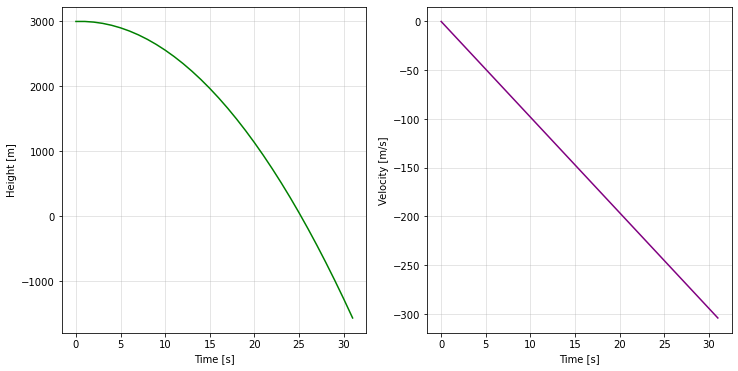

In [ ]:
# Plot the results we unpacked from "sol"
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(time, height, color = 'green')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(alpha = 0.4)

ax[1].plot(time, velocity, color = 'purple')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(alpha = 0.4)

## Solution to the skydiver problem using solve_ivp

The following code provides a solution to the skydiver problem using `solve_ivp` for the case when air resistance is included.

In [ ]:
# Different!!!
# Derivative function
def derivs(time, curr_vals):
    ''' Calculate the derivatives.
    
    Parameters
    ----------
    time : float
        Time at which to calculate the derivatives.
        
    curr_vals : array, float
        Current values of the height and velocity. 
    
    Return
    ------
    dhdt : float
        Derivative of height.
    
    dvdt : float
        Derivative of velocity.
    '''
    # time NEEDS TO BE THE FIRST INPUT PARAMETER!!!!
    
    # Declare parameters
    g = -9.81 # m/s^2
    A = 0.4 # m^2 ### NEW CODE
    m = 80.0 # kg ### NEW CODE
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

![scipy_figure.png](scipy_figure.png)

In [ ]:
# Declare Variables for initial conditions
h0 = 2000 # meters ### MODIFIED CODE
v0 = 0 # m/s

tmax = 30 # seconds ### MODIFIED CODE
dt = 0.1 # seconds ### MODIFIED CODE

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs, (0, tmax), y0 = init)

# Unpack the results stored in the solution variable, "sol"
h = sol.y[0,:]
v = sol.y[1,:]
t = sol.t


In [ ]:
print(sol.y.shape, time.shape)

(2, 13) (301,)


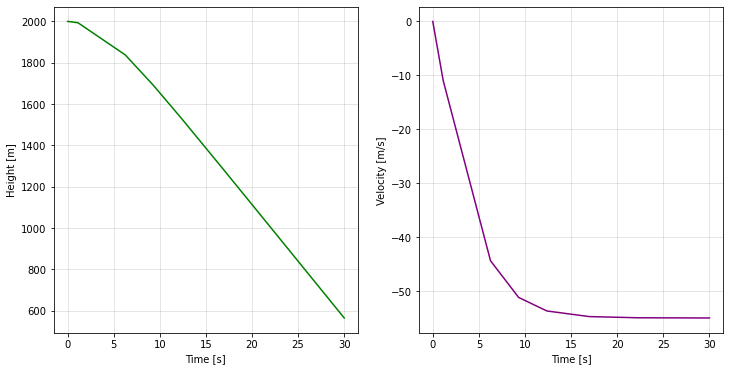

In [ ]:
# Plot the results we unpacked from "sol"
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(t, h, color = 'green')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(alpha = 0.4)

ax[1].plot(t, v, color = 'purple')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(alpha = 0.4)

# Let's have some fun

## Who will reach the ground first?

The friction coefficient depends on the surface area, so let's choose some bodybuilders -because they have the biggest chests- and see who falls the fastest. 

First we need to redefine our derivatives function to take in multiple arguments

In [ ]:
# solve_ivp arguments
# Different!!!
# Derivative function
def derivs_full(time, curr_vals, phys_const):
    ''' Calculate the derivatives.
    
    Parameters
    ----------
    time : float
        Time at which to calculate the derivatives.
        
    curr_vals : array, float
        Current values of the height and velocity. 
    
    phys_const : tuple, float
        Physical constant needed for the solution.
        
    Return
    ------
    dhdt : float
        Derivative of height.
    
    dvdt : float
        Derivative of velocity.
    '''
    # time NEEDS TO BE THE FIRST INPUT PARAMETER!!!!
    
    # Unpack the physical constants
    g, A, m, factor = phys_const
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + (factor * A * v * abs(v))/m
    
    return dhdt, dvdt

Second we need to calculate the chest area of each bodybuilder. So let's write a function to do this.

In [ ]:
def chestarea(shld_span, waist_span, height):
    ''' Calculate the chest area.
    
    Parameters
    ----------
    shld_span : float
        Shoulder span in meters.
    
    waist_span : float
        Waist span in meters.
    
    height : float
        Height in meters
    
    Return
    ------
    chest_area : float
        Chest area in meters
    '''
    # Calculate the torso height from a given ratio.
    torso_height = height/3.44
    # Model the torso a two triangles and a rectangle
    triangles_bases = (shld_span - waist_span)
    triangles_areas = triangles_bases * torso_height
    rectangle_area = waist_span * torso_height
    
    # Total area given by the sum of the areas
    chest_area = rectangle_area + triangles_areas
    
    return chest_area

Finally initialize the bodybuilders measurements and solve and plot the height and velocity of each bodybuilder

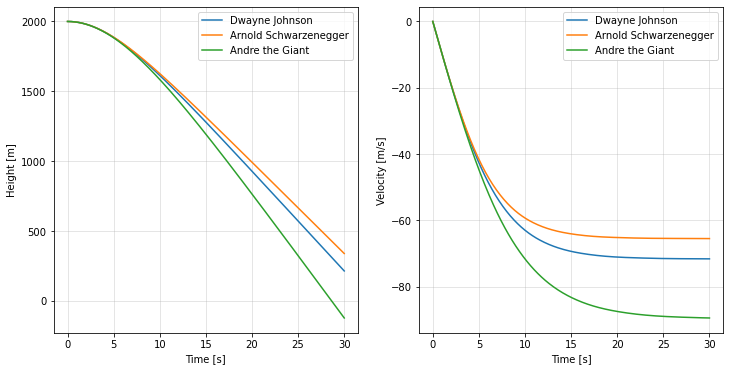

In [ ]:
# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

bodybuilder = [
    {'name': 'Dwayne Johnson',
     'shoulder_span' : 0.57,
     'waist_span': 0.315,
     'height' : 1.90,
     'weight' : 107},
    {'name': 'Arnold Schwarzenegger',
               'shoulder_span' : 0.677,
               'waist_span': 0.385,
               'height' : 1.86,
               'weight' : 104},
    {'name': 'Andre the Giant',
               'shoulder_span' : 0.601,
               'waist_span': 0.456,
               'height' : 2.16,
               'weight' : 201},
]


# Plot the results we unpacked from "sol"
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, bb in enumerate(bodybuilder): 
    
    chest_area = chestarea(bb['shoulder_span'], bb['waist_span'], bb['height'])
    constants = (-9.81, chest_area, bb['weight'], -0.65)

    # Solve the odes with solve_ivp
    sol2 = solve_ivp(derivs_full, (0, tmax), init, t_eval = time, args= [constants])

    # Unpack the results stored in the solution variable, "sol"
    h = sol2.y[0,:]
    v = sol2.y[1,:]
    t = sol2.t
    
    
    ax[0].plot(t, h, label = bb['name'])
    ax[1].plot(t, v, label = bb['name'])

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(alpha = 0.4)
ax[0].legend()
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(alpha = 0.4)
ax[1].legend()

![why](https://media.giphy.com/media/DfTZWmFpLx3os/giphy.gif)

I did this to show you how to use the `args` input parameter of `solve_ivp`. 

&#169; Copyright 2018,  Michigan State University Board of Trustees